In [2]:
import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


possums = pd.read_csv('possum.csv')
possums



,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [3]:
features = possums[["skullw", "belly"]]
output = possums["taill"]

X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=.33, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

# y = m1x1 + m2x2 + b, where x1 is skull width, and x2 is belly girth

m1 = model.coef_[0]
m2 = model.coef_[1]
b = model.intercept_

print(f"y={m1}x1 + {m2}x2 + {b}")

y=0.08941202751768053x1 + 0.15684197446136253x2 + 27.00179884200432


In [8]:
y = (m1 * 58.2) + (m2 * 34) + b
y

np.float64(37.538205975219654)

In [12]:
predictions = model.predict(X_test)
np.sqrt(mean_squared_error(y_test, predictions)) #cm

np.float64(1.9560218625104329)

In [4]:
possums['taill'].max()


np.float64(43.0)

In [8]:
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

df = pd.read_csv('penguins.csv')
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
train_df, _ = train_test_split(df, test_size=0.3, random_state=42)
train_df = train_df[['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g']]
train_df.head()

,culmen_length_mm,culmen_depth_mm,body_mass_g
284,46.4,15.6,5000.0
294,52.5,15.6,5450.0
56,41.3,21.1,4400.0
175,46.4,17.8,3700.0
10,34.6,21.1,4400.0


In [4]:
model = KMeans(n_clusters=5)
model.fit(train_df)

model.cluster_centers_

array([[  49.74594595,   15.8       , 5589.18918919],
       [  39.3       ,   17.49166667, 3212.5       ],
       [  44.17727273,   18.28409091, 4084.09090909],
       [  45.32413793,   15.85689655, 4710.77586207],
       [  43.0362069 ,   18.34310345, 3661.63793103]])

<Axes: xlabel='Clusters', ylabel='Inertia'>

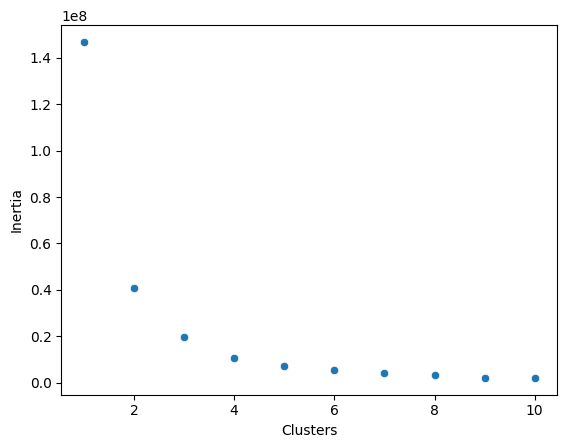

In [7]:
# Test model here.

plot = {
    'Clusters': range(1,11),
    'Inertia': []
}

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_df)
    plot['Inertia'].append(kmeans.inertia_)

sb.scatterplot(data = pd.DataFrame(plot), x='Clusters', y='Inertia')

<Axes: xlabel='Clusters', ylabel='Sillhouette'>

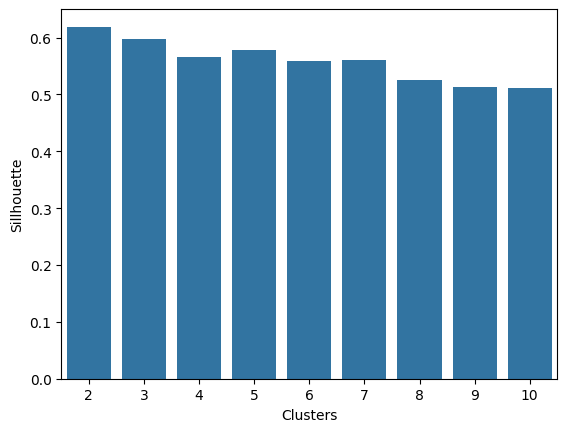

In [9]:
plot = {
    'Clusters': range(2,11),
    'Sillhouette': []
}

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(train_df)
    plot['Sillhouette'].append(silhouette_score(train_df, labels))

plot = pd.DataFrame(plot)

sb.barplot(data=plot, x='Clusters', y='Sillhouette')

The possum will have a tail length of 38 cm.